<a href="https://colab.research.google.com/github/Andre-jvz/SeriesDeTiempo-Tec/blob/main/Inlfacion_mx_A01732626_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pronostico de inflacion
## André Villagrán Zamora A01732626
### Tarea 2- 14 marzo 2023

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
     

In [ ]:
plt.rcParams['figure.figsize']=[12,6]


In [ ]:
inflacion_mex = pd.read_excel('/content/drive/MyDrive/inflacionMx.xlsx')


In [ ]:
inflacion_mex.tail()


,fecha,inflacion,inflacion diff
273,2022/10,8.41,-0.29
274,2022/11,7.80,-0.61
275,2022/12,7.82,0.02
276,2023/01,7.91,0.09
277,2023/02,7.62,-0.29


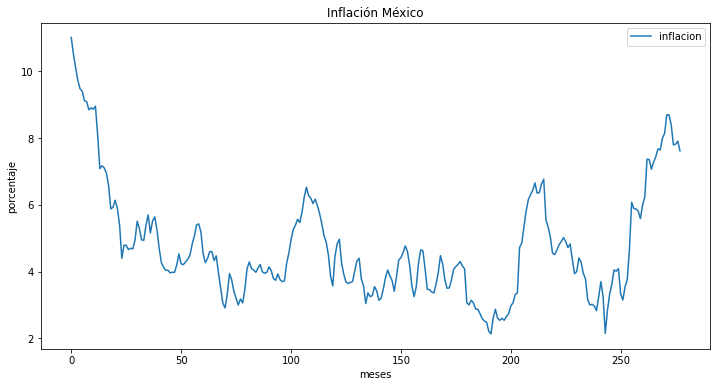

In [ ]:
inflacion_mex.plot()
plt.title('Inflación México')
plt.xlabel('meses')
plt.ylabel('porcentaje')
plt.show()
     

In [ ]:
result_adf = adfuller(inflacion_mex["inflacion"])
print('p-value: %.2f' % result_adf[1])

p-value: 0.05


In [ ]:
inflacion_mex["inflacion diff"] = inflacion_mex["inflacion"].diff()

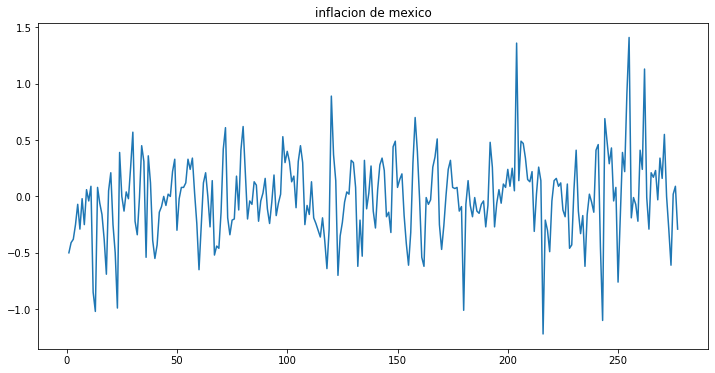

In [ ]:
inflacion_mex["inflacion diff"].plot()
plt.title("inflacion de mexico")
plt.show()

In [ ]:
result_adf = adfuller(inflacion_mex['inflacion diff'].dropna())
print('p-value: %.2f' % result_adf[1])

p-value: 0.00


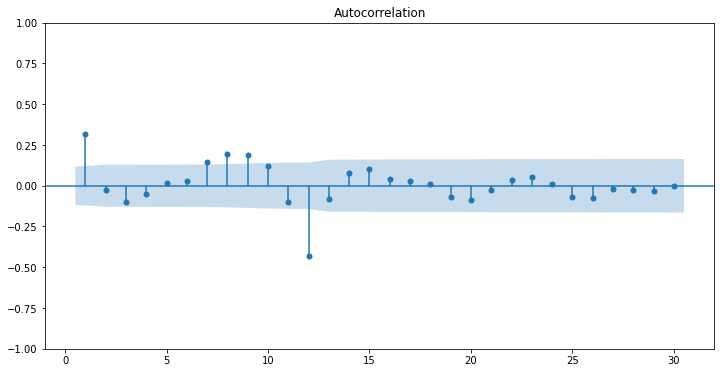

In [ ]:
plot_acf(inflacion_mex["inflacion diff"].dropna(), zero=False, lags=30);

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


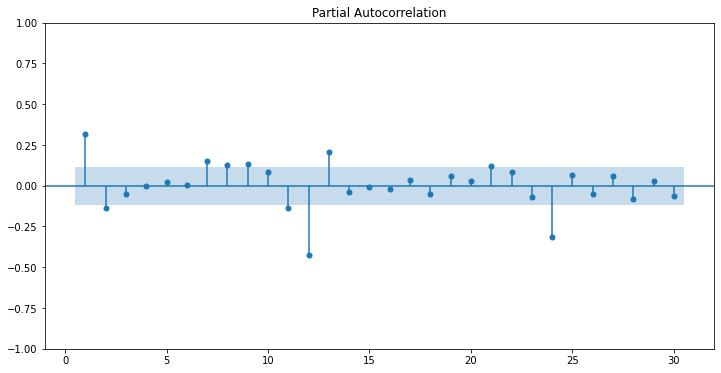

In [ ]:
plot_pacf(inflacion_mex["inflacion diff"].dropna(), zero = False,  lags=30);

In [ ]:

ic = {}
for ar in range(5):
    for ma in range(5):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(inflacion_mex['inflacion'].dropna(), order=(ar, 0, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]

ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])
ic

AR: 0, MA: 0
AR: 0, MA: 1


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 0, MA: 2


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 0, MA: 3


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 0, MA: 4
AR: 1, MA: 0
AR: 1, MA: 1
AR: 1, MA: 2
AR: 1, MA: 3
AR: 1, MA: 4
AR: 2, MA: 0
AR: 2, MA: 1
AR: 2, MA: 2
AR: 2, MA: 3


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 2, MA: 4
AR: 3, MA: 0
AR: 3, MA: 1


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 2
AR: 3, MA: 3


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/

AR: 3, MA: 4


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 0
AR: 4, MA: 1


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 2


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 3


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 4


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC          BIC
AR MA                          
0  0   1079.576561  1086.831803
   1    734.052211   744.935074
   2    553.048280   567.558765
   3    395.499954   413.638059
   4    353.184778   374.950505
1  0    231.989062   242.871926
   1    200.447598   214.958083
   2    201.946460   220.084565
   3    203.084608   224.850334
   4    204.305992   229.699340
2  0    203.358441   217.868925
   1    202.098798   220.236903
   2    203.736207   225.501934
   3    204.792430   230.185778
   4    189.447987   218.468955
3  0    200.949875   219.087980
   1    189.945214   211.710941
   2    204.366460   229.759808
   3    178.299147   207.320116
   4    177.894045   210.542635
4  0    202.420755   224.186482
   1    190.349870   215.743218
   2    206.099335   235.120304
   3    162.984524   195.633114
   4    177.827906   214.104117

In [ ]:
ic.sort_values('AIC', ascending = True)

AIC          BIC
AR MA                          
4  3    162.984524   195.633114
   4    177.827906   214.104117
3  4    177.894045   210.542635
   3    178.299147   207.320116
2  4    189.447987   218.468955
3  1    189.945214   211.710941
4  1    190.349870   215.743218
1  1    200.447598   214.958083
3  0    200.949875   219.087980
1  2    201.946460   220.084565
2  1    202.098798   220.236903
4  0    202.420755   224.186482
1  3    203.084608   224.850334
2  0    203.358441   217.868925
   2    203.736207   225.501934
1  4    204.305992   229.699340
3  2    204.366460   229.759808
2  3    204.792430   230.185778
4  2    206.099335   235.120304
1  0    231.989062   242.871926
0  4    353.184778   374.950505
   3    395.499954   413.638059
   2    553.048280   567.558765
   1    734.052211   744.935074
   0   1079.576561  1086.831803

In [ ]:
modelo1 = ARIMA(inflacion_mex ["inflacion"].dropna(), order=(1, 0, 1))
resultado1 = modelo1.fit()
print(resultado1.summary() )

                               SARIMAX Results                                
Dep. Variable:              inflacion   No. Observations:                  278
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -96.224
Date:                Mon, 13 Mar 2023   AIC                            200.448
Time:                        21:56:14   BIC                            214.958
Sample:                             0   HQIC                           206.269
                                - 278                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1010      1.069      5.707      0.000       4.006       8.196
ar.L1          0.9830      0.010    101.776      0.000       0.964       1.002
ma.L1          0.3515      0.052      6.723      0.0

In [ ]:
inflacion_mex['inflacion mx pronosticada'] = resultado1.predict()

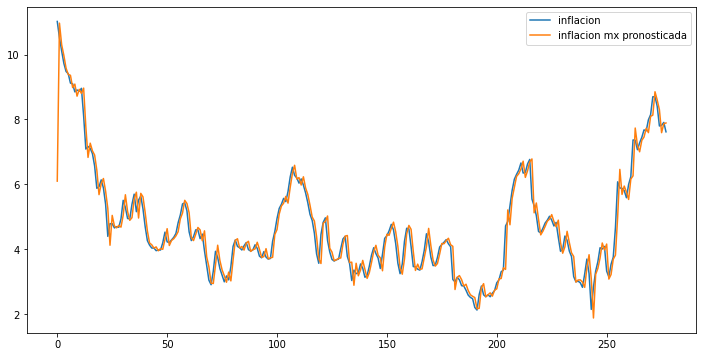

In [ ]:
inflacion_mex[['inflacion', 'inflacion mx pronosticada']].plot();

In [ ]:
inflacion_mex.describe()

,inflacion,inflacion diff,inflacion mx pronosticada
count,278.000000,277.000000,278.000000
mean,4.751511,-0.012274,4.760329
std,1.677582,0.361811,1.653769
min,2.130000,-1.220000,1.885838
25%,3.625000,-0.220000,3.675600
50%,4.290000,-0.010000,4.314446
75%,5.462500,0.210000,5.530234
max,11.020000,1.410000,10.968408


In [ ]:
inflacion_mex.tail()

,fecha,inflacion,inflacion diff,inflacion mx pronosticada
273,2022/10,8.41,-0.29,8.601373
274,2022/11,7.80,-0.61,8.303422
275,2022/12,7.82,0.02,7.594140
276,2023/01,7.91,0.09,7.870106
277,2023/02,7.62,-0.29,7.893215


In [ ]:
resultado1.predict(280, 285)

280    7.450934
281    7.427946
282    7.405350
283    7.383138
284    7.361305
285    7.339843
Name: predicted_mean, dtype: float64

In [ ]:
inflacion_mex['fecha'] = pd.to_datetime(inflacion_mex['fecha'], format= '%Y/%m')
inflacion_mex = inflacion_mex.set_index('fecha')
inflacion_mex = inflacion_mex.asfreq('MS')
inflacion_mex